In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
df1= pd.read_csv("weatherAUS.csv")
df1.head(10)

Using TensorFlow backend.


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [2]:
df1['MinTemp'] = df1['MinTemp'].fillna((df1['MinTemp'].mean()))
df1['MaxTemp'] = df1['MaxTemp'].fillna((df1['MaxTemp'].mean()))
df1['Rainfall'] = df1['Rainfall'].fillna((df1['Rainfall'].mean()))
df1['Evaporation'] = df1['Evaporation'].fillna((df1['Evaporation'].mean()))
df1['Sunshine'] = df1['Sunshine'].fillna((df1['Sunshine'].mean()))
df1['WindGustSpeed'] = df1['WindGustSpeed'].fillna((df1['WindGustSpeed'].mean()))
df1['WindSpeed9am'] = df1['WindSpeed9am'].fillna((df1['WindSpeed9am'].mean()))
df1['WindSpeed3pm'] = df1['WindSpeed3pm'].fillna((df1['WindSpeed3pm'].mean()))
df1['Humidity9am'] = df1['Humidity9am'].fillna((df1['Humidity9am'].mean()))
df1['Humidity3pm'] = df1['Humidity3pm'].fillna((df1['Humidity3pm'].mean()))
df1['Pressure9am'] = df1['Pressure9am'].fillna((df1['Pressure9am'].mean()))
df1['Pressure3pm'] = df1['Pressure3pm'].fillna((df1['Pressure3pm'].mean()))
df1['Cloud9am'] = df1['Cloud9am'].fillna((df1['Cloud9am'].mean()))
df1['Cloud3pm'] = df1['Cloud3pm'].fillna((df1['Cloud3pm'].mean()))
df1['Temp3pm'] = df1['Temp3pm'].fillna((df1['Temp3pm'].mean()))
df1['Temp9am'] = df1['Temp9am'].fillna((df1['Temp9am'].mean()))
df1['RISK_MM'] = df1['RISK_MM'].fillna((df1['RISK_MM'].mean()))
df1['WindGustDir'] = df1['WindGustDir'].fillna("W")
df1['WindDir9am'] = df1['WindDir9am'].fillna("N")
df1['WindDir3pm'] = df1['WindDir3pm'].fillna("SE")
df1['RainToday'] = df1['RainToday'].fillna("No")
df1 = df1.drop(["Date", "Location", "RISK_MM"], axis=1)
df1 = df1.drop('WindGustDir', axis=1)
df1 = df1.drop('WindDir3pm', axis=1)
df1 = df1.drop('WindDir9am', axis=1)
df1 = df1.drop('RainToday', axis=1)
df1['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace=True)

num_cols = df1.columns[df1.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

z = np.abs(stats.zscore(df1[num_cols]))
print(z)
df1 = df1[(z < 3).all(axis=1)]
print(df1.shape)

df2 = df1.sample(n=20000, random_state=1)
x = df2.drop(['RainTomorrow'], axis=1)
y = df2['RainTomorrow']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.7, random_state=1, shuffle=True)
std_Xtrain1 = preprocessing.scale(x_train1)
std_Xtest1 = preprocessing.scale(x_test1)
std_Xtrain1.shape
std_Xtest1.shape


[[0.18995446 0.04596425 0.20775676 ... 0.0135208  0.01641234 0.53755075]
 [0.74917416 0.26347957 0.2789887  ... 0.03283169 0.38027381 0.53755075]
 [0.11169374 0.34787335 0.2789887  ... 0.61996332 0.22017476 0.53755075]
 ...
 [1.34395563 0.29161083 0.2789887  ... 0.94057075 0.40938273 0.53755075]
 [1.06221704 0.51666089 0.2789887  ... 0.69335743 0.64225407 0.53755075]
 [0.68656559 0.53072651 0.2789887  ... 0.29163579 0.62769961 0.53755075]]
(133601, 17)


(6000, 16)

In [3]:
model = Sequential()
model.add(Dense(50, input_dim=16, activation="relu"))
model.add(Dense(40, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(std_Xtrain1, y_train1, epochs=10)
test_loss3, test_acc3 = model.evaluate(std_Xtest1,  y_test1, verbose=2)
train_loss3,train_acc3 = model.evaluate(std_Xtrain1,  y_train1, verbose=2)

print('\nTest accuracy:', test_acc3)
print('\nTrain accuracy:', train_acc3)

Epoch 1/10
14000/14000 [==============================] - 1s 90us/step - loss: 0.4032 - accuracy: 0.8151
Epoch 2/10
14000/14000 [==============================] - 1s 72us/step - loss: 0.3569 - accuracy: 0.8440
Epoch 3/10
14000/14000 [==============================] - 1s 71us/step - loss: 0.3500 - accuracy: 0.8469
Epoch 4/10
14000/14000 [==============================] - 1s 64us/step - loss: 0.3474 - accuracy: 0.8469
Epoch 5/10
14000/14000 [==============================] - 1s 72us/step - loss: 0.3442 - accuracy: 0.8478
Epoch 6/10
14000/14000 [==============================] - 1s 65us/step - loss: 0.3425 - accuracy: 0.8495
Epoch 7/10
14000/14000 [==============================] - 1s 66us/step - loss: 0.3404 - accuracy: 0.8491
Epoch 8/10
14000/14000 [==============================] - 1s 65us/step - loss: 0.3390 - accuracy: 0.8501
Epoch 9/10
14000/14000 [==============================] - 1s 66us/step - loss: 0.3372 - accuracy: 0.8511
Epoch 10/10
14000/14000 [==============================

In [4]:
model = Sequential()
model.add(Dense(70, input_dim=16, activation='relu'))
model.add(Dense(50,  activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(std_Xtrain1, y_train1, epochs=10,batch_size=20)
test_loss3, test_acc3 = model.evaluate(std_Xtest1,  y_test1, verbose=2)
train_loss3,train_acc3 = model.evaluate(std_Xtrain1,  y_train1, verbose=2)

print('\nTest accuracy:', test_acc3)
print('\nTrain accuracy:', train_acc3)

Epoch 1/10
14000/14000 [==============================] - 2s 159us/step - loss: 0.3823 - accuracy: 0.8364
Epoch 2/10
14000/14000 [==============================] - 2s 136us/step - loss: 0.3538 - accuracy: 0.8484
Epoch 3/10
14000/14000 [==============================] - 2s 117us/step - loss: 0.3485 - accuracy: 0.8499
Epoch 4/10
14000/14000 [==============================] - 2s 127us/step - loss: 0.3438 - accuracy: 0.8510
Epoch 5/10
14000/14000 [==============================] - 1s 94us/step - loss: 0.3389 - accuracy: 0.8521
Epoch 6/10
14000/14000 [==============================] - 2s 115us/step - loss: 0.3358 - accuracy: 0.8543
Epoch 7/10
14000/14000 [==============================] - 2s 118us/step - loss: 0.3311 - accuracy: 0.8549
Epoch 8/10
14000/14000 [==============================] - 2s 121us/step - loss: 0.3287 - accuracy: 0.8554
Epoch 9/10
14000/14000 [==============================] - 2s 124us/step - loss: 0.3238 - accuracy: 0.8584
Epoch 10/10
14000/14000 [======================

In [5]:
model = Sequential()
model.add(Dense(50, input_dim=16, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(std_Xtrain1, y_train1, epochs=10,batch_size=20)
test_loss2, test_acc2 = model.evaluate(std_Xtest1,  y_test1, verbose=2)
train_loss2,train_acc2 = model.evaluate(std_Xtrain1,  y_train1, verbose=2)

print('\nTest accuracy:', test_acc2)
print('\nTrain accuracy:', train_acc2)

Epoch 1/10
14000/14000 [==============================] - 2s 144us/step - loss: 0.3851 - accuracy: 0.8317
Epoch 2/10
14000/14000 [==============================] - 1s 100us/step - loss: 0.3545 - accuracy: 0.8456
Epoch 3/10
14000/14000 [==============================] - 1s 102us/step - loss: 0.3506 - accuracy: 0.8470
Epoch 4/10
14000/14000 [==============================] - 1s 106us/step - loss: 0.3465 - accuracy: 0.8475
Epoch 5/10
14000/14000 [==============================] - 1s 101us/step - loss: 0.3441 - accuracy: 0.8501
Epoch 6/10
14000/14000 [==============================] - 1s 105us/step - loss: 0.3413 - accuracy: 0.8523
Epoch 7/10
14000/14000 [==============================] - 1s 106us/step - loss: 0.3388 - accuracy: 0.8523
Epoch 8/10
14000/14000 [==============================] - 1s 107us/step - loss: 0.3365 - accuracy: 0.8535
Epoch 9/10
14000/14000 [==============================] - 1s 102us/step - loss: 0.3339 - accuracy: 0.8522
Epoch 10/10
14000/14000 [=====================

In [6]:
model = Sequential()
model.add(Dense(50, input_dim=16, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(std_Xtrain1, y_train1, epochs=10,batch_size=20)
test_loss1, test_acc1 = model.evaluate(std_Xtest1,  y_test1, verbose=2)
train_loss1,train_acc1 = model.evaluate(std_Xtrain1,  y_train1, verbose=2)

print('\nTest accuracy:', test_acc1)
print('\nTrain accuracy:', train_acc1)

Epoch 1/10
14000/14000 [==============================] - 2s 143us/step - loss: 0.3879 - accuracy: 0.8244
Epoch 2/10
14000/14000 [==============================] - 2s 109us/step - loss: 0.3550 - accuracy: 0.8454
Epoch 3/10
14000/14000 [==============================] - 2s 118us/step - loss: 0.3497 - accuracy: 0.8469
Epoch 4/10
14000/14000 [==============================] - 2s 110us/step - loss: 0.3466 - accuracy: 0.8493
Epoch 5/10
14000/14000 [==============================] - 2s 112us/step - loss: 0.3446 - accuracy: 0.8489
Epoch 6/10
14000/14000 [==============================] - 2s 123us/step - loss: 0.3416 - accuracy: 0.8504
Epoch 7/10
14000/14000 [==============================] - 2s 109us/step - loss: 0.3396 - accuracy: 0.8528
Epoch 8/10
14000/14000 [==============================] - 2s 109us/step - loss: 0.3366 - accuracy: 0.8524
Epoch 9/10
14000/14000 [==============================] - 2s 107us/step - loss: 0.3348 - accuracy: 0.8524
Epoch 10/10
14000/14000 [=====================

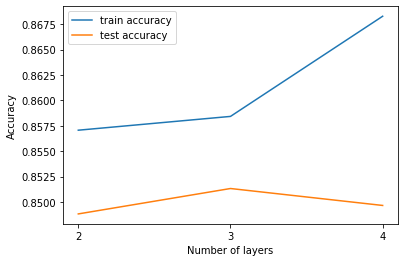

[0.8488333225250244, 0.8513333201408386, 0.8496666550636292]

In [7]:
train_errors=[train_acc1,train_acc2,train_acc3]
test_errors=[test_acc1,test_acc2,test_acc3]
x=[2,3,4]
plt.figure()
plt.plot(x,train_errors,label='train accuracy')
plt.plot(x,test_errors,label='test accuracy')
plt.xlabel("Number of layers")
plt.xticks([2,3,4])
plt.ylabel("Accuracy")
plt.legend()
plt.show()

train_errors
test_errors

Epoch 1/10
 - 1s - loss: 0.3904 - accuracy: 0.8268
Epoch 2/10
 - 1s - loss: 0.3539 - accuracy: 0.8441
Epoch 3/10
 - 1s - loss: 0.3488 - accuracy: 0.8476
Epoch 4/10
 - 1s - loss: 0.3457 - accuracy: 0.8506
Epoch 5/10
 - 1s - loss: 0.3417 - accuracy: 0.8492
Epoch 6/10
 - 1s - loss: 0.3401 - accuracy: 0.8522
Epoch 7/10
 - 1s - loss: 0.3360 - accuracy: 0.8521
Epoch 8/10
 - 1s - loss: 0.3345 - accuracy: 0.8536
Epoch 9/10
 - 1s - loss: 0.3324 - accuracy: 0.8549
Epoch 10/10
 - 1s - loss: 0.3297 - accuracy: 0.8569
Best: 0.842500 using {'neurons': 60}
0.842500 with: {'neurons': 60}
0.839357 with: {'neurons': 70}
0.842071 with: {'neurons': 80}
0.841643 with: {'neurons': 90}


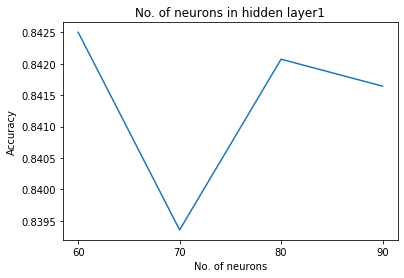

In [9]:
def createmodel(neurons=40):
  
  model = Sequential()
  model.add(Dense(neurons, input_dim=16, activation='relu'))
  model.add(Dense(40, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model
  
model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
neurons = [60,70,80,90]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain1, y_train1)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

for mean,param in zip(means,params):
    print("%f with: %r" % (mean, param))
plt.figure()
plt.plot(neurons,means)
plt.xticks(neurons)
plt.xlabel("No. of neurons")
plt.ylabel("Accuracy")
plt.title("No. of neurons in hidden layer1")
plt.show()

Epoch 1/10
 - 2s - loss: 0.4008 - accuracy: 0.8174
Epoch 2/10
 - 1s - loss: 0.3555 - accuracy: 0.8447
Epoch 3/10
 - 1s - loss: 0.3488 - accuracy: 0.8488
Epoch 4/10
 - 1s - loss: 0.3445 - accuracy: 0.8501
Epoch 5/10
 - 1s - loss: 0.3415 - accuracy: 0.8512
Epoch 6/10
 - 1s - loss: 0.3394 - accuracy: 0.8543
Epoch 7/10
 - 1s - loss: 0.3374 - accuracy: 0.8531
Epoch 8/10
 - 1s - loss: 0.3344 - accuracy: 0.8563
Epoch 9/10
 - 1s - loss: 0.3320 - accuracy: 0.8551
Epoch 10/10
 - 1s - loss: 0.3295 - accuracy: 0.8571
Best: 0.843286 using {'neurons': 40}
0.841357 with: {'neurons': 30}
0.843286 with: {'neurons': 40}
0.839357 with: {'neurons': 50}


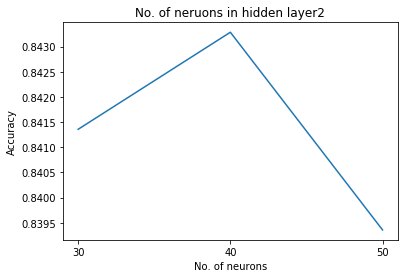

In [10]:
def createmodel(neurons=30):
  
  model = Sequential()
  model.add(Dense(70, input_dim=16, activation='relu'))
  model.add(Dense(neurons, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model
  
model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
neurons = [30,40,50]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain1, y_train1)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

for mean,param in zip(means,params):
    print("%f with: %r" % (mean, param))
plt.figure()
plt.plot(neurons,means)
plt.xticks(neurons)
plt.xlabel("No. of neurons")
plt.ylabel("Accuracy")
plt.title("No. of neruons in hidden layer2")
plt.show()

Epoch 1/10
 - 1s - loss: 0.3846 - accuracy: 0.8309
Epoch 2/10
 - 1s - loss: 0.3554 - accuracy: 0.8456
Epoch 3/10
 - 1s - loss: 0.3494 - accuracy: 0.8502
Epoch 4/10
 - 1s - loss: 0.3447 - accuracy: 0.8507
Epoch 5/10
 - 1s - loss: 0.3419 - accuracy: 0.8507
Epoch 6/10
 - 1s - loss: 0.3377 - accuracy: 0.8535
Epoch 7/10
 - 1s - loss: 0.3347 - accuracy: 0.8540
Epoch 8/10
 - 1s - loss: 0.3317 - accuracy: 0.8567
Epoch 9/10
 - 1s - loss: 0.3294 - accuracy: 0.8581
Epoch 10/10
 - 1s - loss: 0.3259 - accuracy: 0.8567
Best: 0.843357 using {'neurons': 30}
0.842857 with: {'neurons': 10}
0.839786 with: {'neurons': 20}
0.843357 with: {'neurons': 30}
0.840143 with: {'neurons': 40}


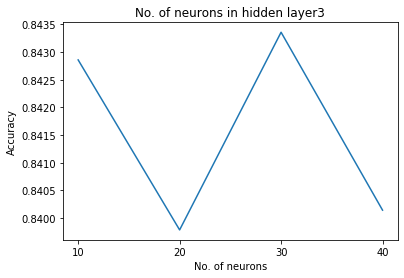

In [11]:
def createmodel(neurons=10):
  
  model = Sequential()
  model.add(Dense(70, input_dim=16, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(neurons, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model
  
model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
neurons = [10,20,30,40]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain1, y_train1)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

for mean,param in zip(means,params):
    print("%f with: %r" % (mean, param))
plt.figure()
plt.plot(neurons,means)
plt.xticks(neurons)
plt.xlabel("No. of neurons")
plt.ylabel("Accuracy")
plt.title("No. of neurons in hidden layer3")
plt.show()

Epoch 1/10
 - 1s - loss: 0.3834 - accuracy: 0.8292
Epoch 2/10
 - 1s - loss: 0.3607 - accuracy: 0.8426
Epoch 3/10
 - 1s - loss: 0.3565 - accuracy: 0.8464
Epoch 4/10
 - 1s - loss: 0.3542 - accuracy: 0.8460
Epoch 5/10
 - 1s - loss: 0.3502 - accuracy: 0.8464
Epoch 6/10
 - 1s - loss: 0.3488 - accuracy: 0.8484
Epoch 7/10
 - 1s - loss: 0.3466 - accuracy: 0.8476
Epoch 8/10
 - 1s - loss: 0.3442 - accuracy: 0.8516
Epoch 9/10
 - 1s - loss: 0.3429 - accuracy: 0.8503
Epoch 10/10
 - 1s - loss: 0.3409 - accuracy: 0.8531
Best: 0.844571 using {'activation': 'tanh'}
0.844357 with: {'activation': 'relu'}
0.844571 with: {'activation': 'tanh'}
0.841786 with: {'activation': 'sigmoid'}


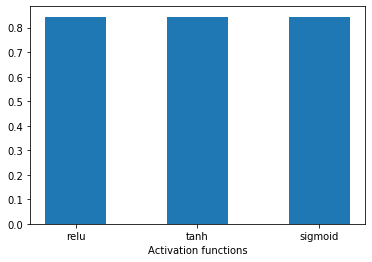

In [12]:
def createmodel(activation="relu"):
  
  
  model = Sequential()
  model.add(Dense(60, input_dim=16, activation=activation))
  model.add(Dense(40, activation=activation))
  model.add(Dense(30, activation=activation))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
activation = ['relu', 'tanh', 'sigmoid']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain1, y_train1)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

for mean,param in zip(means,params):
    print("%f with: %r" % (mean, param))
plt.figure()
plt.bar(activation,means,width=0.5)
plt.xlabel("Activation functions")
plt.show()

In [15]:
def createmodel(activation="relu"):
  
  
  model = Sequential()
  model.add(Dense(60, input_dim=16, activation=activation))
  model.add(Dense(40, activation=activation))
  model.add(Dense(30, activation=activation))
  model.add(Dense(1, activation=activation))

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
activation = ['relu', 'tanh', 'sigmoid']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain1, y_train1)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means1 = grid_result.cv_results_['mean_test_score']
params1 = grid_result.cv_results_['params']

for mean,param in zip(means1,params1):
    print("%f with: %r" % (mean, param))
    
accuracies=[means[0],means[1],means1[0],means1[1],means1[2]]


Epoch 1/10
 - 1s - loss: 0.4809 - accuracy: 0.8285
Epoch 2/10
 - 1s - loss: 0.4353 - accuracy: 0.8327
Epoch 3/10
 - 1s - loss: 0.4014 - accuracy: 0.8426
Epoch 4/10
 - 1s - loss: 0.4029 - accuracy: 0.8409
Epoch 5/10
 - 1s - loss: 0.3793 - accuracy: 0.8378
Epoch 6/10
 - 1s - loss: 0.3853 - accuracy: 0.8381
Epoch 7/10
 - 1s - loss: 0.3740 - accuracy: 0.8478
Epoch 8/10
 - 1s - loss: 0.3884 - accuracy: 0.8405
Epoch 9/10
 - 1s - loss: 0.3743 - accuracy: 0.8436
Epoch 10/10
 - 1s - loss: 0.3707 - accuracy: 0.8438
Best: 0.843214 using {'activation': 'relu'}
0.843214 with: {'activation': 'relu'}
0.756000 with: {'activation': 'tanh'}
0.843000 with: {'activation': 'sigmoid'}


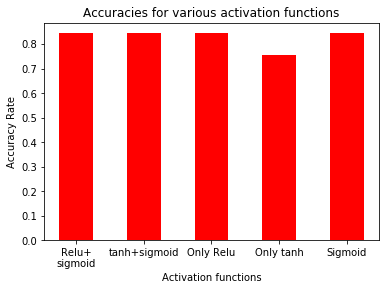

In [16]:
plt.figure()
xaxis=["Relu+\nsigmoid","tanh+sigmoid","Only Relu","Only tanh","Sigmoid"]
plt.bar(xaxis,accuracies,color="red",width=0.5)
plt.xlabel("Activation functions")
plt.ylabel("Accuracy Rate")
plt.title("Accuracies for various activation functions",)
plt.show()

Epoch 1/10
 - 1s - loss: 0.3737 - accuracy: 0.8332
Epoch 2/10
 - 1s - loss: 0.3589 - accuracy: 0.8436
Epoch 3/10
 - 1s - loss: 0.3560 - accuracy: 0.8441
Epoch 4/10
 - 1s - loss: 0.3542 - accuracy: 0.8448
Epoch 5/10
 - 1s - loss: 0.3524 - accuracy: 0.8470
Epoch 6/10
 - 1s - loss: 0.3508 - accuracy: 0.8451
Epoch 7/10
 - 1s - loss: 0.3500 - accuracy: 0.8473
Epoch 8/10
 - 1s - loss: 0.3489 - accuracy: 0.8494
Epoch 9/10
 - 1s - loss: 0.3481 - accuracy: 0.8486
Epoch 10/10
 - 1s - loss: 0.3476 - accuracy: 0.8488
Best: 0.843857 using {'optimizer': 'Adagrad'}
0.843429 with: {'optimizer': 'SGD'}
0.839357 with: {'optimizer': 'RMSprop'}
0.843857 with: {'optimizer': 'Adagrad'}
0.842929 with: {'optimizer': 'Adadelta'}
0.841643 with: {'optimizer': 'Adam'}
0.842643 with: {'optimizer': 'Adamax'}


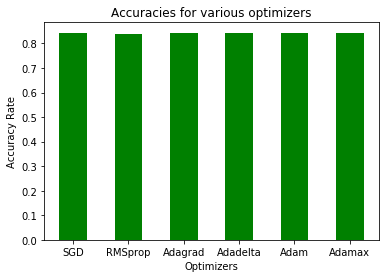

In [14]:
def createmodel(optimizer="adam"):
  
  
  model = Sequential()
  model.add(Dense(60, input_dim=16, activation="tanh"))
  model.add(Dense(40, activation="tanh"))
  model.add(Dense(30, activation="tanh"))
  model.add(Dense(1, activation="sigmoid"))

  model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain1, y_train1)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means1 = grid_result.cv_results_['mean_test_score']
params1 = grid_result.cv_results_['params']
for mean,param in zip(means1,params1):
    print("%f with: %r" % (mean, param))
    
plt.bar(optimizer,means1,color="green",width=0.5)
plt.xlabel("Optimizers")
plt.ylabel("Accuracy Rate")
plt.title("Accuracies for various optimizers")
plt.show()

Epoch 1/10
 - 1s - loss: 0.3767 - accuracy: 0.8342
Epoch 2/10
 - 1s - loss: 0.3631 - accuracy: 0.8412
Epoch 3/10
 - 1s - loss: 0.3593 - accuracy: 0.8432
Epoch 4/10
 - 0s - loss: 0.3589 - accuracy: 0.8434
Epoch 5/10
 - 1s - loss: 0.3569 - accuracy: 0.8451
Epoch 6/10
 - 0s - loss: 0.3559 - accuracy: 0.8454
Epoch 7/10
 - 0s - loss: 0.3551 - accuracy: 0.8459
Epoch 8/10
 - 0s - loss: 0.3546 - accuracy: 0.8445
Epoch 9/10
 - 0s - loss: 0.3528 - accuracy: 0.8452
Epoch 10/10
 - 0s - loss: 0.3528 - accuracy: 0.8453
Best: 0.845214 using {'dropout_rate': 0.1}
0.843286 with: {'dropout_rate': 0.0}
0.845214 with: {'dropout_rate': 0.1}
0.844571 with: {'dropout_rate': 0.2}
0.843929 with: {'dropout_rate': 0.3}
0.844929 with: {'dropout_rate': 0.4}
0.844429 with: {'dropout_rate': 0.5}
0.844286 with: {'dropout_rate': 0.6}
0.843429 with: {'dropout_rate': 0.7}
0.842571 with: {'dropout_rate': 0.8}
0.844143 with: {'dropout_rate': 0.9}


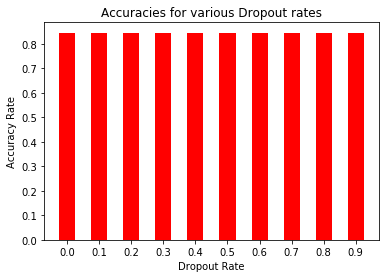

In [17]:
from keras.layers import Dropout

def createmodel(dropout_rate=0.0):
  
  
  model = Sequential()
  model.add(Dense(60, input_dim=16, activation="tanh"))
  model.add(Dense(40, activation="tanh"))
  model.add(Dense(30, activation="tanh"))
  model.add(Dropout(dropout_rate))

  model.add(Dense(1, activation="sigmoid"))

  model.compile(optimizer="Adagrad",
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=createmodel, epochs=10, verbose=2)
# define the grid search parameters
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(std_Xtrain1, y_train1)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means1 = grid_result.cv_results_['mean_test_score']
params1 = grid_result.cv_results_['params']
for mean,param in zip(means1,params1):
    print("%f with: %r" % (mean, param))
    
plt.figure()
plt.bar(dropout_rate,means1,color="red",width=0.05)
plt.xticks(dropout_rate)
plt.xlabel("Dropout Rate")
plt.ylabel("Accuracy Rate")
plt.title("Accuracies for various Dropout rates")
plt.show()

In [18]:
model = Sequential()
model.add(Dense(60, input_dim=16, activation="tanh"))
model.add(Dense(40, activation="tanh"))
model.add(Dense(30, activation="tanh"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="Adagrad",
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(std_Xtrain1, y_train1, epochs=10)
test_loss3, test_acc3 = model.evaluate(std_Xtest1,  y_test1, verbose=2)
train_loss3,train_acc3 = model.evaluate(std_Xtrain1,  y_train1, verbose=2)
print('\nTest accuracy:', test_acc3)
print('\nTrain accuracy:', train_acc3)

Epoch 1/10
14000/14000 [==============================] - 1s 39us/step - loss: 0.3749 - accuracy: 0.8350
Epoch 2/10
14000/14000 [==============================] - 0s 34us/step - loss: 0.3608 - accuracy: 0.8418
Epoch 3/10
14000/14000 [==============================] - 1s 36us/step - loss: 0.3574 - accuracy: 0.8444
Epoch 4/10
14000/14000 [==============================] - 1s 37us/step - loss: 0.3569 - accuracy: 0.8427
Epoch 5/10
14000/14000 [==============================] - 1s 39us/step - loss: 0.3576 - accuracy: 0.8460
Epoch 6/10
14000/14000 [==============================] - 1s 36us/step - loss: 0.3549 - accuracy: 0.8450 0s - loss: 0.3552 - 
Epoch 7/10
14000/14000 [==============================] - 1s 42us/step - loss: 0.3538 - accuracy: 0.8468
Epoch 8/10
14000/14000 [==============================] - 1s 43us/step - loss: 0.3535 - accuracy: 0.8473
Epoch 9/10
14000/14000 [==============================] - 1s 44us/step - loss: 0.3518 - accuracy: 0.8461
Epoch 10/10
14000/14000 [=========

In [22]:
#KNN

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
df1= pd.read_csv("weatherAUS.csv")

df1['MinTemp'] = df1['MinTemp'].fillna((df1['MinTemp'].mean()))
df1['MaxTemp'] = df1['MaxTemp'].fillna((df1['MaxTemp'].mean()))
df1['Rainfall'] = df1['Rainfall'].fillna((df1['Rainfall'].mean()))
df1['Evaporation'] = df1['Evaporation'].fillna((df1['Evaporation'].mean()))
df1['Sunshine'] = df1['Sunshine'].fillna((df1['Sunshine'].mean()))
df1['WindGustSpeed'] = df1['WindGustSpeed'].fillna((df1['WindGustSpeed'].mean()))
df1['WindSpeed9am'] = df1['WindSpeed9am'].fillna((df1['WindSpeed9am'].mean()))
df1['WindSpeed3pm'] = df1['WindSpeed3pm'].fillna((df1['WindSpeed3pm'].mean()))
df1['Humidity9am'] = df1['Humidity9am'].fillna((df1['Humidity9am'].mean()))
df1['Humidity3pm'] = df1['Humidity3pm'].fillna((df1['Humidity3pm'].mean()))
df1['Pressure9am'] = df1['Pressure9am'].fillna((df1['Pressure9am'].mean()))
df1['Pressure3pm'] = df1['Pressure3pm'].fillna((df1['Pressure3pm'].mean()))
df1['Cloud9am'] = df1['Cloud9am'].fillna((df1['Cloud9am'].mean()))
df1['Cloud3pm'] = df1['Cloud3pm'].fillna((df1['Cloud3pm'].mean()))
df1['Temp3pm'] = df1['Temp3pm'].fillna((df1['Temp3pm'].mean()))
df1['Temp9am'] = df1['Temp9am'].fillna((df1['Temp9am'].mean()))
df1['RISK_MM'] = df1['RISK_MM'].fillna((df1['RISK_MM'].mean()))
df1['WindGustDir'] = df1['WindGustDir'].fillna("W")
df1['WindDir9am'] = df1['WindDir9am'].fillna("N")
df1['WindDir3pm'] = df1['WindDir3pm'].fillna("SE")
df1['RainToday'] = df1['RainToday'].fillna("No")
df1 = df1.drop(["Date", "Location", "RISK_MM"], axis=1)
df1 = df1.drop('WindGustDir', axis=1)
df1 = df1.drop('WindDir3pm', axis=1)
df1 = df1.drop('WindDir9am', axis=1)
df1 = df1.drop('RainToday', axis=1)
df1['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace=True)

num_cols = df1.columns[df1.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

z = np.abs(stats.zscore(df1[num_cols]))
print(z)
df1 = df1[(z < 3).all(axis=1)]
print(df1.shape)

df2 = df1.sample(n=20000, random_state=1)
x = df2.drop(['RainTomorrow'], axis=1)
y = df2['RainTomorrow']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.7, random_state=1, shuffle=True)
scaler = StandardScaler()

scaler.fit(x_train1)

std_Xtrain1 = scaler.transform(x_train1)
std_Xtest1 = scaler.transform(x_test1)

std_Xtrain1.shape
std_Xtest1.shape


[[0.18995446 0.04596425 0.20775676 ... 0.0135208  0.01641234 0.53755075]
 [0.74917416 0.26347957 0.2789887  ... 0.03283169 0.38027381 0.53755075]
 [0.11169374 0.34787335 0.2789887  ... 0.61996332 0.22017476 0.53755075]
 ...
 [1.34395563 0.29161083 0.2789887  ... 0.94057075 0.40938273 0.53755075]
 [1.06221704 0.51666089 0.2789887  ... 0.69335743 0.64225407 0.53755075]
 [0.68656559 0.53072651 0.2789887  ... 0.29163579 0.62769961 0.53755075]]
(133601, 17)


(6000, 16)

In [24]:
#Euclidean
train_error = []
test_error=[]
train_accuracies=[]
test_accuracies=[]

# Calculating error for K values between 1 and 40
for i in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=i,metric="euclidean")
    knn.fit(std_Xtrain1, y_train1)
    train_pred=knn.predict(std_Xtrain1)

    test_pred = knn.predict(std_Xtest1)
    
    train_accuracies.append(accuracy_score(y_train1,train_pred))
    test_accuracies.append(accuracy_score(y_test1,test_pred))
    train_error.append(np.mean(y_train1!=train_pred))
    test_error.append(np.mean(y_test1!=test_pred))

Text(0, 0.5, 'Mean Error')

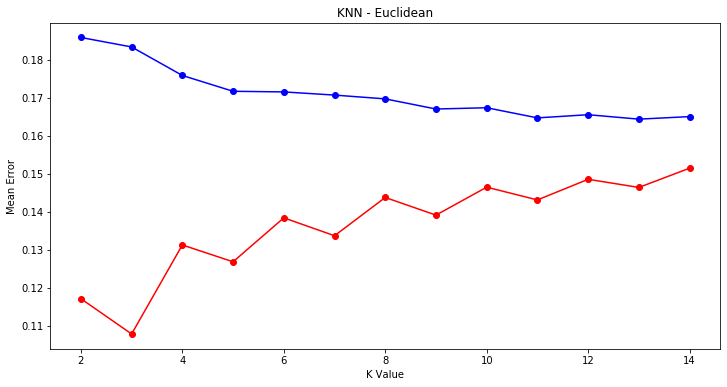

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 15),train_error, marker='o' ,color='red' )
plt.plot(range(2, 15),test_error, marker='o' ,color='blue' )

plt.title('KNN - Euclidean')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [26]:
#Manhattan
train_error = []
test_error=[]
train_accuracies=[]
test_accuracies=[]
# Calculating error for K values between 1 and 40
for i in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=i,metric="manhattan")
    knn.fit(std_Xtrain1, y_train1)
    train_pred=knn.predict(std_Xtrain1)

    test_pred = knn.predict(std_Xtest1)
    
    train_accuracies.append(accuracy_score(y_train1,train_pred))
    test_accuracies.append(accuracy_score(y_test1,test_pred))
    train_error.append(np.mean(y_train1!=train_pred))
    test_error.append(np.mean(y_test1!=test_pred))

Text(0, 0.5, 'Mean Error')

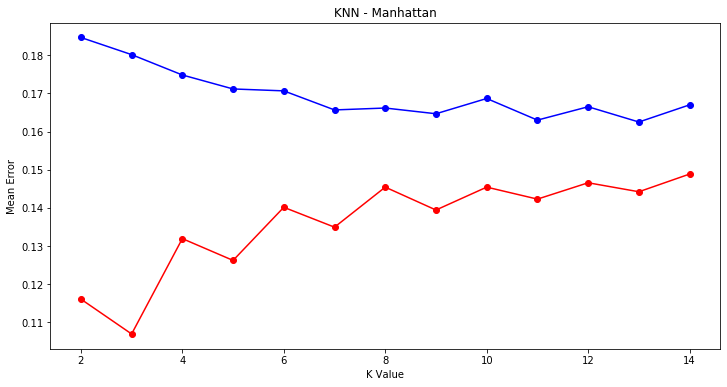

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 15),train_error, marker='o' ,color='red' )
plt.plot(range(2, 15),test_error, marker='o' ,color='blue' )

plt.title('KNN - Manhattan')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [28]:
knn = KNeighborsClassifier(n_neighbors=8,metric="manhattan")
knn.fit(std_Xtrain1, y_train1)
train_pred=knn.predict(std_Xtrain1)

test_pred = knn.predict(std_Xtest1)
print(classification_report(y_test1,test_pred))
print(confusion_matrix(y_test1,test_pred))
print(accuracy_score(y_test1,test_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      4713
           1       0.74      0.34      0.47      1287

    accuracy                           0.83      6000
   macro avg       0.79      0.66      0.69      6000
weighted avg       0.82      0.83      0.81      6000

[[4560  153]
 [ 844  443]]
0.8338333333333333
